In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitutde and logitude combinations.

lats = np.random.uniform(-90.000,90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [5]:
# Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

577

In [7]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Begginning Data Retrieval    ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Conver the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Appdne the city information into the city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")
        

Begginning Data Retrieval    
-----------------------------
Processing Record 1 of Set 1 | lufilufi
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | kombissiri
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | lavrentiya
Processing Record 6 of Set 1 | pitimbu
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | dingle
Processing Record 10 of Set 1 | chara
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | virginia beach
Processing Record 18 of Set 1 | oranjemund
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | karratha
Processi

Processing Record 38 of Set 4 | liverpool
Processing Record 39 of Set 4 | chumikan
Processing Record 40 of Set 4 | mwinilunga
Processing Record 41 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 42 of Set 4 | upernavik
Processing Record 43 of Set 4 | husavik
Processing Record 44 of Set 4 | waghai
Processing Record 45 of Set 4 | marcona
City not found. Skipping...
Processing Record 46 of Set 4 | mindelo
Processing Record 47 of Set 4 | saint-pierre
Processing Record 48 of Set 4 | lindi
Processing Record 49 of Set 4 | boende
Processing Record 50 of Set 4 | mettur
Processing Record 1 of Set 5 | khandyga
Processing Record 2 of Set 5 | mogadishu
Processing Record 3 of Set 5 | antofagasta
Processing Record 4 of Set 5 | balakliya
Processing Record 5 of Set 5 | arawa
Processing Record 6 of Set 5 | enshi
Processing Record 7 of Set 5 | mitu
Processing Record 8 of Set 5 | paulo afonso
Processing Record 9 of Set 5 | paramonga
Processing Record 10 of Set 5 | axim
Processing Re

Processing Record 25 of Set 8 | acapulco
Processing Record 26 of Set 8 | suntar
Processing Record 27 of Set 8 | olinda
Processing Record 28 of Set 8 | los alamos
Processing Record 29 of Set 8 | tucuman
Processing Record 30 of Set 8 | itarema
Processing Record 31 of Set 8 | sao joao da barra
Processing Record 32 of Set 8 | nola
Processing Record 33 of Set 8 | leh
Processing Record 34 of Set 8 | aleksandrov gay
Processing Record 35 of Set 8 | bage
Processing Record 36 of Set 8 | clyde river
Processing Record 37 of Set 8 | islamkot
Processing Record 38 of Set 8 | darnah
Processing Record 39 of Set 8 | imbituba
Processing Record 40 of Set 8 | naze
Processing Record 41 of Set 8 | san jose
Processing Record 42 of Set 8 | demba
Processing Record 43 of Set 8 | vanderhoof
Processing Record 44 of Set 8 | satitoa
City not found. Skipping...
Processing Record 45 of Set 8 | njombe
Processing Record 46 of Set 8 | nouadhibou
Processing Record 47 of Set 8 | lockhart
Processing Record 48 of Set 8 | ata

Processing Record 13 of Set 12 | issa
Processing Record 14 of Set 12 | barnala
Processing Record 15 of Set 12 | esperance
Processing Record 16 of Set 12 | srednekolymsk
Processing Record 17 of Set 12 | lillooet
Processing Record 18 of Set 12 | saint-francois
Processing Record 19 of Set 12 | haines junction
Processing Record 20 of Set 12 | shu
Processing Record 21 of Set 12 | ukiah
Processing Record 22 of Set 12 | baturaden
Processing Record 23 of Set 12 | pamanukan
Processing Record 24 of Set 12 | sovetskiy
Processing Record 25 of Set 12 | darlowo
Processing Record 26 of Set 12 | kharitonovo
Processing Record 27 of Set 12 | mapiripan
------------------------------
Data Retrieval Complete       
------------------------------


In [9]:
len(city_data)

529

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lufilufi,-13.8745,-171.5986,82.11,73,75,5.79,WS,2022-04-24 13:22:46
1,Kodiak,57.7900,-152.4072,38.71,93,100,10.36,US,2022-04-24 13:22:46
2,Kombissiri,12.0656,-1.3375,105.78,6,99,9.69,BF,2022-04-24 13:22:46
3,Provideniya,64.3833,-173.3000,23.40,83,13,4.03,RU,2022-04-24 13:22:47
4,Lavrentiya,65.5833,-171.0000,13.08,92,91,5.82,RU,2022-04-24 13:22:47
5,Pitimbu,-7.4706,-34.8086,79.39,77,98,14.12,BR,2022-04-24 13:22:47
6,Busselton,-33.6500,115.3333,63.50,58,100,8.81,AU,2022-04-24 13:22:48
7,Mar Del Plata,-38.0023,-57.5575,59.88,81,0,14.97,AR,2022-04-24 13:22:48
8,Dingle,10.9995,122.6711,78.08,86,88,7.96,PH,2022-04-24 13:22:48
9,Chara,56.9064,118.2631,21.07,67,83,3.58,RU,2022-04-24 13:22:49


In [11]:
# get columns into the correct order
new_column_order = ['City', 'Country', 'Date', 'Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lufilufi,WS,2022-04-24 13:22:46,-13.8745,-171.5986,82.11,73,75,5.79
1,Kodiak,US,2022-04-24 13:22:46,57.7900,-152.4072,38.71,93,100,10.36
2,Kombissiri,BF,2022-04-24 13:22:46,12.0656,-1.3375,105.78,6,99,9.69
3,Provideniya,RU,2022-04-24 13:22:47,64.3833,-173.3000,23.40,83,13,4.03
4,Lavrentiya,RU,2022-04-24 13:22:47,65.5833,-171.0000,13.08,92,91,5.82
5,Pitimbu,BR,2022-04-24 13:22:47,-7.4706,-34.8086,79.39,77,98,14.12
6,Busselton,AU,2022-04-24 13:22:48,-33.6500,115.3333,63.50,58,100,8.81
7,Mar Del Plata,AR,2022-04-24 13:22:48,-38.0023,-57.5575,59.88,81,0,14.97
8,Dingle,PH,2022-04-24 13:22:48,10.9995,122.6711,78.08,86,88,7.96
9,Chara,RU,2022-04-24 13:22:49,56.9064,118.2631,21.07,67,83,3.58


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DF for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time Module
import time
# Get today's date in seconds
today = time.time()
today

1650809509.2982295

In [15]:
today = time.strftime("%x")
today

'04/24/22'

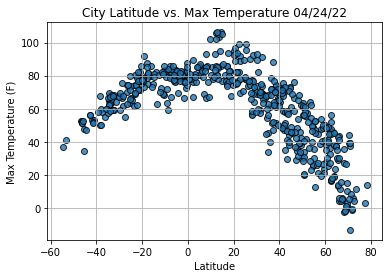

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

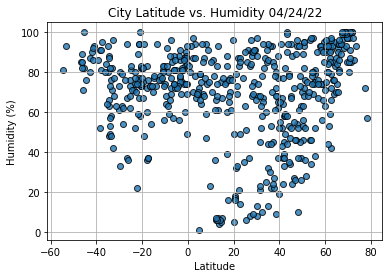

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

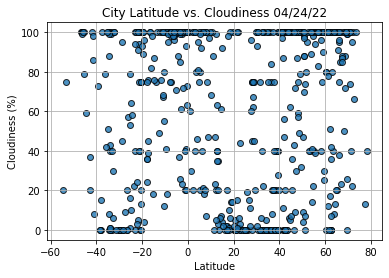

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

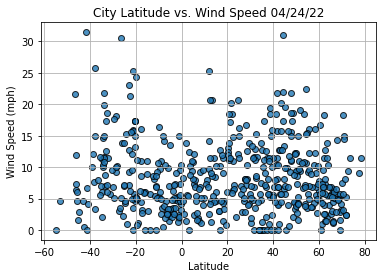

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# using loc method to find a specific row from an existing DF.
index13 = city_data_df.loc[13]
index13

City                      Qaanaaq
Country                        GL
Date          2022-04-24 13:22:50
Lat                        77.484
Lng                      -69.3632
Max Temp                      2.7
Humidity                       72
Cloudiness                     13
Wind Speed                   9.04
Name: 13, dtype: object

In [22]:
#filtering a DF 
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
524    False
525     True
526     True
527     True
528     True
Name: Lat, Length: 529, dtype: bool

In [23]:
# return all rows in a DF based on specific criteria using loc method.
city_data_df.loc[(city_data_df['Lat'] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kodiak,US,2022-04-24 13:22:46,57.7900,-152.4072,38.71,93,100,10.36
2,Kombissiri,BF,2022-04-24 13:22:46,12.0656,-1.3375,105.78,6,99,9.69
3,Provideniya,RU,2022-04-24 13:22:47,64.3833,-173.3000,23.40,83,13,4.03
4,Lavrentiya,RU,2022-04-24 13:22:47,65.5833,-171.0000,13.08,92,91,5.82
8,Dingle,PH,2022-04-24 13:22:48,10.9995,122.6711,78.08,86,88,7.96


In [24]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

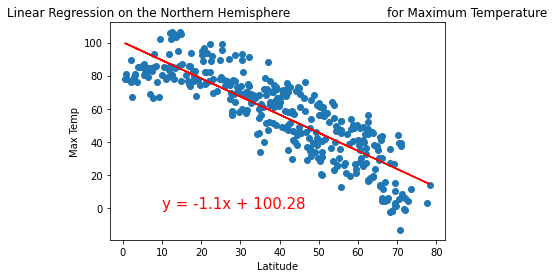

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

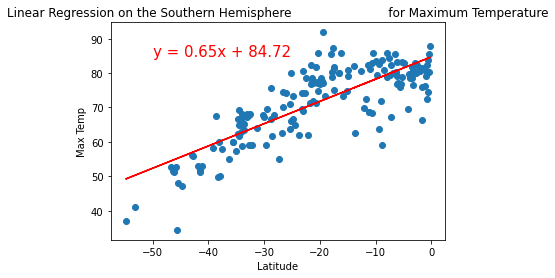

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

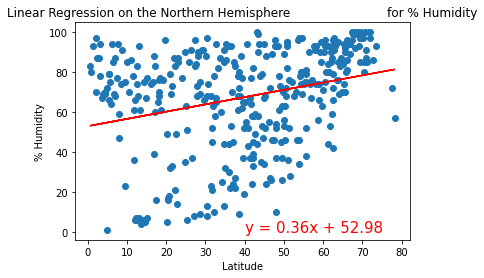

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,0))

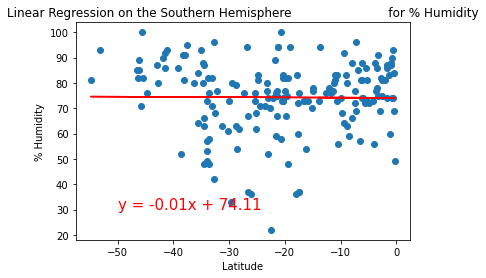

In [28]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

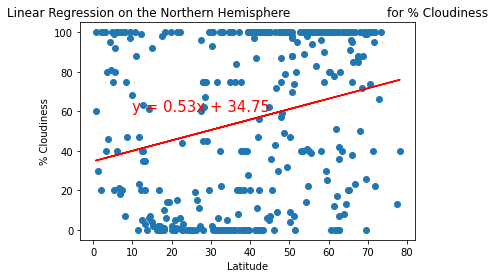

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

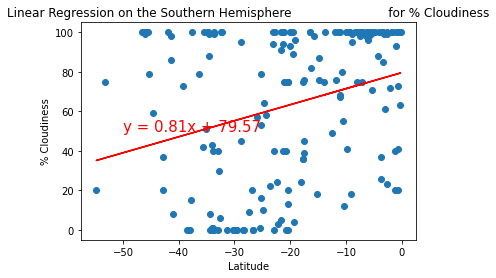

In [30]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,50))

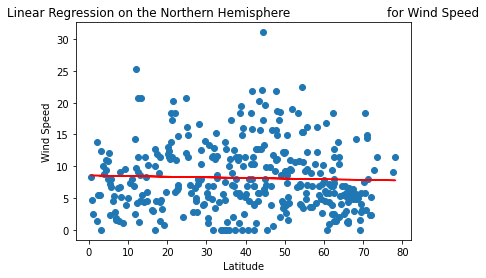

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(45,37))

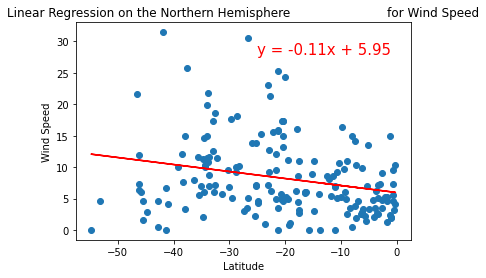

In [32]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-25,28))